For this exercise, the implementation is divided in four groups labeled as TM1, TM2, TM3 and TM4. Each team member will work in only one of the groups, however, all groups should be complete in order for the algorithm to work. 

# Logistic Regression

In this first part, we will implement logistic regression using batch gradient descent. The next steps will guide you through the implementation.

First, we will load the numpy and matplotlib library. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Then, we load the dataset that we will use for training and testing our algorithm.

In [21]:
Xs = np.load('./data/ex03.reg.train.ft.npy') #training features
ys = np.load('./data/ex03.reg.train.lb.npy') #training labels

Xt = np.load('./data/ex03.reg.test.ft.npy') #testing features
yt = np.load('./data/ex03.reg.test.lb.npy') #testing labels

thi = np.load('./data/ex03.reg.w.npy') #initial parameters.

The features Matrix (Xs and Xt) are $m\times n$ numpy arrays where each row correspond to a feature vector and the labels (ys and yt) are $m\times 1$ numpy arrays where each element can be either 0 or 1. Let's print the first 5 elements, to see how they look:

In [22]:
#Adding bias

# bias_col = np.ones((Xs.shape[0],1))
# Xs = np.hstack((bias_col, Xs))
print('*Features Matrix')
print('Shape: ' + str(Xs.shape))
print('First 5 elements:\n' + str(Xs[0:5]))
print('*Labels')
print('Shape: ' +  str(ys.shape))
print('First 5 elements:\n' + str(ys[0:5]))
print('*Initial weights')
print(thi.shape)
print(thi)

*Features Matrix
Shape: (400, 2)
First 5 elements:
[[ 0.0257384   0.07356659]
 [ 0.05684302  0.0531371 ]
 [ 0.0428545   0.06111346]
 [ 0.10163394  0.09047114]
 [ 0.03650691  0.03184156]]
*Labels
Shape: (400, 1)
First 5 elements:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]
*Initial weights
(3, 1)
[[ -4.24165502]
 [ 26.7368333 ]
 [ 29.77781363]]


Here, $m$ is the number of samples and $n$ the number of features. We have $m=400$ for the training set and $m=200$ for the testing set. The number of features is $n=2$. We can obtain this values using the code below: 

In [4]:
m = Xs.shape[0]
n = Xs.shape[1]
b = np.ones((Xs.shape[0], Xs.shape[1] + 1))
b[:,1:] = Xs
Xs = b
b = np.ones((Xt.shape[0], Xt.shape[1] + 1))
b[:,1:] = Xt
Xt = b

$\bf TM1$. Now let's begin with the implementation. As first point, we will implement a function for evaluating the sigmoid function given a set of parameters $g(\theta^t {\bf x}) = g(z) = 1 / (1 + exp(-z))$. 

The parameters for the function will be:
xs.- A numpy array of dimension $m \times n$ with the features Matrix.
th.- Is the vector of parameters or weights of the model. 

The function should return a $m \times 1$ numpy array $h$ where each element $h[i, 0] = g(\theta^t {\bf x^{(i)}})$

In [5]:
def eval(xs, th):
    return 1 / (1+ np.exp(-np.dot(xs, th)))

Let's check the function by running the next code: 

In [6]:
Xaux = Xs[0:3]
gzaux = eval(xs=Xaux, th=thi)
print(Xaux)
print(gzaux)

[[ 1.          0.0257384   0.07356659]
 [ 1.          0.05684302  0.0531371 ]
 [ 1.          0.0428545   0.06111346]]
[[ 0.20377921]
 [ 0.24240376]
 [ 0.2182257 ]]


You should get an array similar to this: <br>
[ [ 0.0257384 &nbsp;  0.07356659]<br>
 [ 0.05684302 &nbsp; 0.0531371 ]<br>
 [ 0.0428545 &nbsp;  0.06111346] ]<br>
 Maybe with some decimal variations due to possible differences in precision. 

$\bf TM2$. Implement the loss function. Now, the parameters are: 
xs.- A numpy array of dimension $m \times n$ with the features Matrix.
ys.- A numpy array of dimensions $m \times 1$ with the labels.
th.- The vector of parameters o weights of the model. 
lamb.- The regularization parameter.

This function should return a single float. 

In [7]:
def loss(xs, ys, th, lamb=0):    
    logistic_output = eval(xs, th)
    loss_output = -(np.dot(ys.T, (np.log(logistic_output))) + np.dot((1 - ys).T,np.log(1 - logistic_output)));
    loss_output+= lamb/2 * np.dot(th.T,th)
    return loss_output

To check we can run the next code: 

In [8]:
laux = loss(xs=Xs, ys=ys, th=thi)
print(laux)
laux = loss(xs=Xs, ys=ys, th=thi, lamb=1.0)
print(laux)

[[ 102.34820702]]
[[ 912.13224557]]


You should get values around 102.3482 and 903.1364.

$\bf TM3$. Implement a function for compute the gradient as $G_j = \sum_{i=1,\dots,m}[y^{(i)}-h_\theta(x^{(i)})]x^{(i)}_j$. The parameters for this function are the same than the last function.

It should return a $n \times 1$ numpy array with the gradients for each of the $n$ weights. 

In [9]:
def batch_gradient(xs, ys, th, lamb=0):
    g = np.zeros(th.shape)
    e = eval(xs, th)
    for j in range(0, xs.shape[1]):
        for i in range(0, xs.shape[0]):
            g[j] += (ys[i] - e[i])*xs[i,j]
            if j!=0:
                g[j] -= lamb/(xs.shape[0])*th[j]
    return g

Let's compute the gradient for the current state of the model:

In [10]:
gaux = batch_gradient(xs=Xs, ys=ys, th=thi)
print(gaux)
gaux = batch_gradient(xs=Xs, ys=ys, th=thi, lamb=1.0)
print(gaux)

[[-0.25212338]
 [ 1.60139881]
 [ 1.75284086]]
[[ -0.25212338]
 [-25.1354345 ]
 [-28.02497277]]


You should get two arrays with values around:<br>
[ [-0.25212338]<br>
 [ 1.60139881]<br>
 [ 1.75284086] ]<br>
[ [ -0.25212338]<br>
 [-25.1354345 ]<br>
 [-28.02497277] ]

$\bf TM4$. Implement the gradient descent algorithm. The parameters for this function are: 
xs.- A numpy array of dimension $m \times n$ with the features Matrix.
ys.- A numpy array of dimensions $m \times 1$ with the labels.
th_init.- The initial vector of parameters o weights of the model. 
lt.- A float with the learning rate.
T.- The number of running iterations.
lamb.- The regularization parameter.

It returns the optimized vector of parameters (th) and a python array with the loss for each iteration.  

In [11]:
def train(xs, ys, th_init, lr, T, lamb=0):
    losses = []
    th = np.copy(th_init)
    for i in range(T):
        losses.append(loss(xs, ys, th, lamb))
        #---TM4.- Compute the gradient and update the weitghs here:
        th = th + lr * batch_gradient(xs, ys, th, lamb)        
        #-----------------------------------------------
    losses.append(loss(xs, ys, th, lamb))
    return th, losses

Now, for testing, we set up the hyperparameters and load a $n \times 1$ numpy array with the initial weights.  

In [12]:
lr = 1e-3
T = 100000
lamb = 0 
thi = np.load('./data/ex03.reg.w.npy') #initial parameters.

We run the algorithm and print the number of elements correctly classified. Also, we show the final weights and a graph of the loss. Running this part could take some time.

199 out of 200 predictions correct


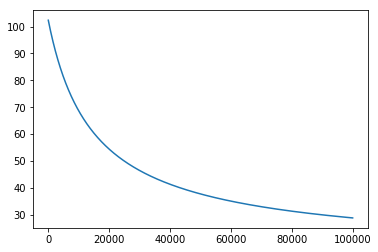

In [14]:
op_th, ls = train(Xs, ys, thi, lr, T, lamb)
ls=np.squeeze(ls);
gz = eval(Xt, op_th) #evaluating the logistic function
y_predict = (gz >= 0.5).astype(np.int32)
correct = np.sum(y_predict == yt)
print("%d out of %d predictions correct" % (correct, len(y_predict)))
plt.plot(ls)
plt.show()

$\bf TM1$, $\bf TM2$, $\bf TM3$, $\bf TM4$ Train again, but change the learning rate (lr) to 1e-5. Compare the graphs.

199 out of 200 predictions correct


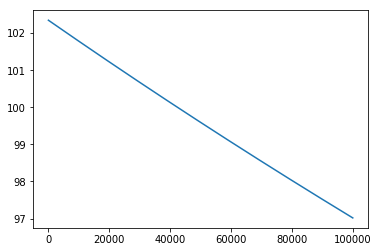

In [15]:
lr = 1e-5
T = 100000
lamb = 0 
thi = np.load('./data/ex03.reg.w.npy') #initial parameters.
op_th, ls = train(Xs, ys, thi, lr, T, lamb)
ls=np.squeeze(ls)
gz = eval(Xt, op_th) #evaluating the logistic function
y_predict = (gz >= 0.5).astype(np.int32)
correct = np.sum(y_predict == yt)
print("%d out of %d predictions correct" % (correct, len(y_predict)))
plt.plot(ls)
plt.show()

# Support Vector Machine

The dataset for this exercise is composed by 2000 images for training and 876 for testing. Each image is a $24\times 24$ bounding box obtained from a blood sample and can contain either background or a blood parasite know as T. cruzi. The dataset was one of the result from a Mexican project for the diagnosis of Chagas disease (CONACYT/SALUD-2009-C01-113848, contact: Dr. Hugo Ruiz rpina@correo.uady.mx). The picture bellow show some negative (top) and positive (bottom) samples from the dataset. 
<img src="dataset.jpg">

The features are $m\times n$ numpy arrays and the labels are $m\times 1$ numpy arrays with $m$ the number of samples and $n$ the number of features. We have $m=2000$ for the training set and $m=876$ for the testing set. The number of features is $n=12$. We save this values for the training set in two variables. As before, we load some libraries and the dataset for training and testing. 

Note: you'll need the python module cvxopt. You can install via "pip install cvxopt" (For more detailed installations options see http://cvxopt.org/install/index.html).

In [23]:
import cvxopt
import cvxopt.solvers
import data.svm as svm

Xs = np.load('./data/ex03.chagas.ft.train.npy') #training features
ys = np.load('./data/ex03.chagas.label.1-1.train.npy') #training labels

Xt = np.load('./data/ex03.chagas.ft.test.npy') #testing features
yt = np.load('./data/ex03.chagas.label.1-1.test.npy') #testing labels

Again, we can see some of the samples and labels:

In [24]:
print('*Features Matrix')
print('Shape: ' + str(Xs.shape))
print('First 5 elements:\n' + str(Xs[0:5]))
print('*Labels')
print('Shape: ' +  str(ys.shape))
print('First 5 elements:\n' + str(ys[0:5]))

*Features Matrix
Shape: (2000, 12)
First 5 elements:
[[ 0.57777097  0.54774646  0.69579929  0.0460708   0.10126769  0.08421694
   0.33381929  0.30002618  0.48413665  0.00212252  0.01025514  0.00709249]
 [ 0.52168437  0.52414216  0.66214597  0.02717556  0.02799127  0.02858336
   0.27215458  0.274725    0.43843728  0.00073851  0.00078351  0.00081701]
 [ 0.53195125  0.45142293  0.62625272  0.0354268   0.11623582  0.08456892
   0.28297214  0.20378266  0.39219247  0.00125506  0.01351077  0.0071519 ]
 [ 0.56395697  0.48425926  0.68728214  0.03398967  0.11100243  0.09859347
   0.31804747  0.23450703  0.47235673  0.0011553   0.01232154  0.00972067]
 [ 0.52086057  0.48314951  0.62939815  0.0350372   0.09734438  0.07128154
   0.27129573  0.23343345  0.39614203  0.00122761  0.00947593  0.00508106]]
*Labels
Shape: (2000, 1)
First 5 elements:
[[ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]]


Now we can compute the linear kernel as: 

In [25]:
def linear_kernel(x, z, kernel_params=None):
    return np.dot(x, z)

Where x and z are $n-$ dimensional numpy arrays (shape=[n,]) corresponding to particular features vectors. The function returns a single float. We can compute the kernel for the 0 and 1 features as: 

In [26]:
K_x = linear_kernel(Xs[0], Xs[1])
print(K_x)

1.44127970537


Now, following a similar strategy:

$\bf TM2$ Compute the polynomial kernel:

In [27]:
def polynomial_kernel(x, z, kernel_params={'a' : 1, 'c' : 1, 'd' : 3}):
    a = kernel_params['a']
    c = kernel_params['c']
    d = kernel_params['d']
    return (a * np.dot(x,z) + c)**d
    #TODO Compute the polynomial kernel with the given parameters
    

Let's compute the values for some pair of samples:

In [28]:
K_x = polynomial_kernel(Xs[0], Xs[1])
print(K_x)
K_x = polynomial_kernel(Xs[3], Xs[20])
print(K_x)

14.5496525513
13.1720336949


For this, you should've obtain values around 14.5496 and 13.1720

$\bf TM3$ Compute the radial basis function (gaussian) kernel:

In [29]:
def gaussian_kernel(x, z, kernel_params={'sigma' : 5.0}):
    sigma = kernel_params['sigma']
    return np.exp((-1/(2 * sigma**2) * np.linalg.norm(x - z) ** 2 ))
    #TODO Compute the gaussian kernel with the given parameters
    

Now, we check the function: 

In [30]:
K_x = gaussian_kernel(Xs[0], Xs[1])
print(K_x)
K_x = gaussian_kernel(Xs[3], Xs[20])
print(K_x)

0.999593700488
0.99983772681


And we get values arround: 0.9996 and 0.9998

For this functions, the parameter "kernel_params" is a dictionary with the parameters for the kernel. 
In order to complete the svm code, we need to compute the kernel matrix. Also, once obtained the optimal Lagrange multipliers, we need to obtain the support vectors. (Note: if needed you can compute the norm of a vector with np.linalg.norm)

${\bf TM1}$ Given the features matrix (Xs) and a particular kernel, compute the kernel matrix (Gram matrix).  

In [31]:
def gram_matrix(X, kernel, kernel_params={'a' : 1, 'c' : 1, 'd' : 3, 'sigma' : 0.5}):
    gram_X=np.empty((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]): 
           gram_X[i,j] = kernel(X[i], X[j], kernel_params)
    return gram_X

It should return a $m\times m$ numpy array. Note that the parameter "kernel" takes a function as input. 

To check, let's compute the kernel matrix for the first 3 features:

In [32]:
KM = gram_matrix(X=Xs[0:3], kernel=linear_kernel)
print(KM)

[[ 1.5734516   1.44127971  1.3565511 ]
 [ 1.44127971  1.32942692  1.24039027]
 [ 1.3565511   1.24039027  1.1765158 ]]


You will  obtain an array similar to: <br>
[ [ 1.5734516 &nbsp;  1.44127971 &nbsp; 1.3565511 ]<br>
 [ 1.44127971 &nbsp; 1.32942692 &nbsp; 1.24039027] <br>
 [ 1.3565511 &nbsp;  1.24039027 &nbsp; 1.1765158 ] ]

$\bf TM4$ Given a $m$- dimensional numpy array with the lagrange multipliers (input variable $a$), the features matrix (input variable $X$), the labels array (input variable $y$), and the regularization parameter C (for softmargin svm), obtain the support vectors. (Hint: compare the multipliers with a small number instead of zero, e.g. 1e-5).

In [33]:
def support_vectors(a, X, y, C=None):
    print(a.shape, X.shape, y.shape)
    sva, sv, svy = None, None, None
    #Compute the support vectors here
    if(C is None):
        C = 1e-5
    sva, sv, svy =  a[np.where( a< C)], X[np.where(a< C)],y[np.where( a< C)]
    #-------------------------------
    return sva, sv, svy

The function should return 3 numpy arrays: a $k$- dimensional array with the lagrange multipliers for the support vectors, a $k \times n$ numpy array with the support vectors, and a $k$ dimensional array with the labels for the support vectors. 

Let's try the function with the next code:

In [34]:
aaux = np.array([1.000e+03, 3.071e+01, 1.4039e+05, 1.00e+03, 23.234, 7.8832e+02, 1.000e+03, 1.232e+03])
sa_aux, sv_aux, svy_aux = support_vectors(a=aaux, X=Xs[0:8], y=ys[0:8], C=900)
print(sa_aux)
print(sv_aux)
print(svy_aux)

(8,) (8, 12) (8, 1)
[  30.71    23.234  788.32 ]
[[ 0.52168437  0.52414216  0.66214597  0.02717556  0.02799127  0.02858336
   0.27215458  0.274725    0.43843728  0.00073851  0.00078351  0.00081701]
 [ 0.52086057  0.48314951  0.62939815  0.0350372   0.09734438  0.07128154
   0.27129573  0.23343345  0.39614203  0.00122761  0.00947593  0.00508106]
 [ 0.54445806  0.55502451  0.68804466  0.03304641  0.09772327  0.07112868
   0.29643458  0.30805221  0.47340546  0.00109207  0.00954984  0.00505929]]
[[-1.]
 [ 1.]
 [ 1.]]


We should have something similar to: <br>
[  30.71 &nbsp;   23.234 &nbsp; 788.32 ]<br>
[ [ 0.52168437 &nbsp; 0.52414216 &nbsp; 0.66214597 &nbsp; 0.02717556  &nbsp;0.02799127 &nbsp; 0.02858336<br>
   0.27215458 &nbsp; 0.274725   &nbsp; 0.43843728 &nbsp; 0.00073851 &nbsp; 0.00078351 &nbsp; 0.00081701]<br>
 [ 0.52086057 &nbsp; 0.48314951 &nbsp; 0.62939815 &nbsp; 0.0350372 &nbsp;  0.09734438 &nbsp; 0.07128154<br>
   0.27129573 &nbsp; 0.23343345 &nbsp; 0.39614203 &nbsp; 0.00122761 &nbsp; 0.00947593 &nbsp; 0.00508106]<br>
 [ 0.54445806 &nbsp; 0.55502451 &nbsp; 0.68804466 &nbsp; 0.03304641 &nbsp; 0.09772327 &nbsp; 0.07112868<br>
   0.29643458 &nbsp; 0.30805221 &nbsp; 0.47340546 &nbsp; 0.00109207 &nbsp; 0.00954984 &nbsp; 0.00505929] ]<br>
[ [-1.]<br>
 [ 1.]<br>
 [ 1.] ]<br>

Now, let's try the algorithm. Again, this part could take some time.

In [35]:
#Setting up the hyperparameters. 
C = None
kernel_params = {
    'a' : 1, 
    'c' : 1, 
    'd' : 3, 
    'sigma' : 0.5
}
#creating the model
model = svm.SVM(kernel=gaussian_kernel, C=C)

#finding the optimal margin
#The function fit take as arguments:
#the X feature matrix. 
#The y vector of labels. 
#The function to compute the kernel matrix
#The function to compute the support vectors
#A dictionary with the kernel parameters
model.fit(X=Xs, y=ys, gram_matrix=gram_matrix, support_vectors=support_vectors, kernel_params=kernel_params)

y_predict = model.predict(Xt)
correct = np.sum(y_predict == yt[:,0])
print("%d out of %d predictions correct" % (correct, len(y_predict)))

     pcost       dcost       gap    pres   dres
 0: -4.4800e+02 -2.2327e+03  1e+04  7e+01  4e+00
 1: -1.1807e+03 -5.4426e+03  1e+04  5e+01  3e+00
 2: -2.4567e+03 -8.5308e+03  1e+04  4e+01  3e+00
 3: -6.8816e+03 -1.4054e+04  9e+03  2e+01  2e+00
 4: -9.4298e+03 -1.7189e+04  9e+03  2e+01  1e+00
 5: -1.7793e+04 -2.6963e+04  1e+04  2e+01  1e+00
 6: -2.8733e+04 -3.9511e+04  1e+04  2e+01  1e+00
 7: -7.2696e+04 -8.9663e+04  2e+04  2e+01  1e+00
 8: -8.3397e+04 -1.0200e+05  2e+04  2e+01  1e+00
 9: -1.3377e+05 -1.5968e+05  3e+04  2e+01  1e+00
10: -2.6910e+05 -3.1275e+05  4e+04  2e+01  1e+00
11: -3.3168e+05 -3.8301e+05  5e+04  2e+01  1e+00
12: -4.2738e+05 -4.9046e+05  6e+04  2e+01  1e+00
13: -6.5598e+05 -7.4755e+05  9e+04  2e+01  1e+00
14: -9.1638e+05 -1.0416e+06  1e+05  2e+01  1e+00
15: -2.0578e+06 -2.3450e+06  3e+05  2e+01  1e+00
16: -3.1006e+06 -3.5750e+06  5e+05  2e+01  1e+00
17: -4.1106e+06 -4.7981e+06  7e+05  2e+01  1e+00
18: -7.3924e+06 -9.1542e+06  2e+06  1e+01  8e-01
19: -1.1157e+07 -1.38

$\bf TM1$, $\bf TM2$, $\bf TM3$, $\bf TM4$ Copy the last code in the next line and try with a value of C = 100 and sigma = 1.0

In [36]:
#Setting up the hyperparameters. 
C = 100
kernel_params = {
    'a' : 1, 
    'c' : 1,
    'd' : 3, 
    'sigma' : 1.0
}
#creating the model
model = svm.SVM(kernel=gaussian_kernel, C=C)

#finding the optimal margin
#The function fit take as arguments:
#the X feature matrix. 
#The y vector of labels. 
#The function to compute the kernel matrix
#The function to compute the support vectors
#A dictionary with the kernel parameters
model.fit(X=Xs, y=ys, gram_matrix=gram_matrix, support_vectors=support_vectors, kernel_params=kernel_params)

y_predict = model.predict(Xt)
correct = np.sum(y_predict == yt[:,0])
print("%d out of %d predictions correct" % (correct, len(y_predict)))

     pcost       dcost       gap    pres   dres
 0:  3.8505e+05 -1.6490e+07  5e+07  9e-01  7e-13
 1:  6.0112e+05 -6.1002e+06  9e+06  1e-01  7e-13
 2:  2.5702e+05 -1.6024e+06  2e+06  2e-02  5e-13
 3:  6.1068e+04 -3.5360e+05  4e+05  2e-03  4e-13
 4:  1.3564e+04 -1.4873e+05  2e+05  4e-04  4e-13
 5:  1.1509e+03 -8.7497e+04  9e+04  8e-05  4e-13
 6: -3.2761e+03 -5.5229e+04  5e+04  4e-05  4e-13
 7: -6.0125e+03 -3.7359e+04  3e+04  2e-05  4e-13
 8: -6.6422e+03 -3.4476e+04  3e+04  2e-05  4e-13
 9: -8.2619e+03 -2.5109e+04  2e+04  4e-06  5e-13
10: -8.6784e+03 -2.3254e+04  1e+04  3e-06  4e-13
11: -9.3564e+03 -2.0564e+04  1e+04  2e-06  4e-13
12: -9.7427e+03 -1.9269e+04  1e+04  2e-06  4e-13
13: -1.0049e+04 -1.7915e+04  8e+03  9e-07  4e-13
14: -1.0654e+04 -1.5612e+04  5e+03  4e-07  5e-13
15: -1.0746e+04 -1.5222e+04  4e+03  3e-07  5e-13
16: -1.1130e+04 -1.4154e+04  3e+03  1e-07  5e-13
17: -1.1294e+04 -1.3847e+04  3e+03  8e-08  6e-13
18: -1.1492e+04 -1.3386e+04  2e+03  4e-08  6e-13
19: -1.1661e+04 -1.30

$\bf TM1$, $\bf TM2$, $\bf TM3$, $\bf TM4$ Again copy and run the test with the polynomial kernel and C = 100. Keep the parameters a, c, and d to their default value.

In [37]:
#Setting up the hyperparameters. 
C = 100
kernel_params = {
    'a' : 1, 
    'c' : 1,
    'd' : 3, 
    'sigma' : 1.0
}
#creating the model
model = svm.SVM(kernel=polynomial_kernel, C=C)

#finding the optimal margin
#The function fit take as arguments:
#the X feature matrix. 
#The y vector of labels. 
#The function to compute the kernel matrix
#The function to compute the support vectors
#A dictionary with the kernel parameters
model.fit(X=Xs, y=ys, gram_matrix=gram_matrix, support_vectors=support_vectors, kernel_params=kernel_params)

y_predict = model.predict(Xt)
correct = np.sum(y_predict == yt[:,0])
print("%d out of %d predictions correct" % (correct, len(y_predict)))

     pcost       dcost       gap    pres   dres
 0:  2.0729e+05 -1.6044e+07  5e+07  1e+00  1e-11
 1:  3.4324e+05 -5.5779e+06  8e+06  8e-02  8e-12
 2:  1.8755e+05 -1.7660e+06  2e+06  2e-02  6e-12
 3:  8.7444e+04 -8.0887e+05  1e+06  8e-03  5e-12
 4:  3.4923e+04 -3.9424e+05  4e+05  3e-03  5e-12
 5:  1.1596e+04 -2.0036e+05  2e+05  1e-03  5e-12
 6:  1.7633e+03 -1.0651e+05  1e+05  5e-04  5e-12
 7: -2.0712e+03 -7.4463e+04  7e+04  1e-04  5e-12
 8: -2.5776e+03 -6.7242e+04  6e+04  9e-05  5e-12
 9: -4.8111e+03 -4.5756e+04  4e+04  5e-05  5e-12
10: -6.0293e+03 -3.2387e+04  3e+04  2e-05  5e-12
11: -6.7371e+03 -2.8931e+04  2e+04  1e-05  5e-12
12: -7.5910e+03 -2.4124e+04  2e+04  7e-06  5e-12
13: -7.8689e+03 -2.2762e+04  1e+04  5e-06  5e-12
14: -8.3269e+03 -1.9584e+04  1e+04  3e-06  7e-12
15: -8.6954e+03 -1.8482e+04  1e+04  2e-06  7e-12
16: -9.0228e+03 -1.7049e+04  8e+03  1e-06  6e-12
17: -9.5818e+03 -1.5486e+04  6e+03  8e-07  6e-12
18: -9.9215e+03 -1.4477e+04  5e+03  5e-07  6e-12
19: -1.0033e+04 -1.39

As you can see, you can test with different combinations of hyperparameters to improve the accuracy of the algorithm. The code presented here is a basic implementation of SVM. You can use a more robust library in your projects, e.g. LIBSVM (https://www.csie.ntu.edu.tw/~cjlin/libsvm/). 